<a href="https://colab.research.google.com/github/omsharma-001/Deep_Learning_Computer_Vision_Models/blob/main/CNN_Food_Vision_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-05-29 06:24:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-29 06:24:41 (75.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

--2023-05-29 06:24:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  66.6MB/s    in 24s     

2023-05-29 06:25:14 (64.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode = "categorical", image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode = "categorical", image_size=IMG_SIZE)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint_path = "101_classes_10_percent_model"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True,monitor = "val_accuracy", save_best_only=True )

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),


])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(train_data.class_names), activation = "softmax")(x)
model = tf.keras.Model(inputs, outputs)


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history = model.fit(train_data, epochs = 5, validation_data = test_data, callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 168s 641ms/step - loss: 3.3821 - accuracy: 0.2702 - val_loss: 2.3154 - val_accuracy: 0.4793
Epoch 2/5
237/237 [==============================] - 123s 515ms/step - loss: 2.2126 - accuracy: 0.5017 - val_loss: 1.8780 - val_accuracy: 0.5381
Epoch 3/5
237/237 [==============================] - 109s 461ms/step - loss: 1.8201 - accuracy: 0.5731 - val_loss: 1.7171 - val_accuracy: 0.5615
Epoch 4/5
237/237 [==============================] - 104s 436ms/step - loss: 1.6250 - accuracy: 0.6077 - val_loss: 1.6372 - val_accuracy: 0.5732
Epoch 5/5
237/237 [==============================] - 100s 422ms/step - loss: 1.4602 - accuracy: 0.6441 - val_loss: 1.5825 - val_accuracy: 0.5831


In [ ]:
base_model.trainable= True
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])


In [ ]:
history_2 = model.fit(train_data, epochs = 10, initial_epoch = history.epoch[-1], validation_data = test_data, callbacks = [checkpoint_callback])

Epoch 5/10
237/237 [==============================] - 110s 423ms/step - loss: 1.5201 - accuracy: 0.5886 - val_loss: 1.6013 - val_accuracy: 0.5764
Epoch 6/10
237/237 [==============================] - 94s 395ms/step - loss: 1.0736 - accuracy: 0.6966 - val_loss: 1.6183 - val_accuracy: 0.5797
Epoch 7/10
237/237 [==============================] - 93s 389ms/step - loss: 0.8207 - accuracy: 0.7624 - val_loss: 1.7191 - val_accuracy: 0.5712
Epoch 8/10
237/237 [==============================] - 92s 386ms/step - loss: 0.6435 - accuracy: 0.8164 - val_loss: 1.6940 - val_accuracy: 0.5844
Epoch 9/10
237/237 [==============================] - 90s 379ms/step - loss: 0.5122 - accuracy: 0.8487 - val_loss: 1.8453 - val_accuracy: 0.5647
Epoch 10/10
237/237 [==============================] - 88s 372ms/step - loss: 0.4158 - accuracy: 0.8789 - val_loss: 1.8260 - val_accuracy: 0.5781


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 57s 71ms/step - loss: 1.8260 - accuracy: 0.5781


[1.825961947441101, 0.5780594348907471]

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

In [ ]:
unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
loaded_model.evaluate(test_data)

In [ ]:
pred_prob = loaded_model.predict(test_data)

790/790 [==============================] - 62s 76ms/step


In [ ]:
pred_prob.shape

(25250, 101)

In [ ]:
index = pred_prob[0].argmax()

In [ ]:
test_data.class_names[index]

'ceviche'

In [ ]:
pred_class = pred_prob.argmax(axis = 1)
pred_class.shape

(25250,)

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true = y_labels, y_pred = pred_class)
sklearn_accuracy

0.009782178217821782

In [ ]:
from helper_functions import make_confusion_matrix


In [ ]:
make_confusion_matrix(y_true = y_labels, y_pred = pred_class, classes = test_data.class_names, figsize = (100,100), text_size = 20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_labels, y_pred = pred_class))

              precision    recall  f1-score   support

           0       0.02      0.01      0.01       250
           1       0.01      0.01      0.01       250
           2       0.01      0.01      0.01       250
           3       0.02      0.01      0.01       250
           4       0.01      0.01      0.01       250
           5       0.01      0.02      0.01       250
           6       0.01      0.01      0.01       250
           7       0.01      0.01      0.01       250
           8       0.02      0.02      0.02       250
           9       0.01      0.01      0.01       250
          10       0.02      0.01      0.01       250
          11       0.01      0.00      0.01       250
          12       0.02      0.03      0.03       250
          13       0.02      0.02      0.02       250
          14       0.01      0.01      0.01       250
          15       0.00      0.00      0.00       250
          16       0.02      0.03      0.02       250
          17       0.01    

In [ ]:
classification_report_dic = classification_report(y_labels, pred_class, output_dict = True )
classification_report_dic

{'0': {'precision': 0.017241379310344827,
  'recall': 0.012,
  'f1-score': 0.014150943396226415,
  'support': 250},
 '1': {'precision': 0.0058823529411764705,
  'recall': 0.008,
  'f1-score': 0.006779661016949153,
  'support': 250},
 '2': {'precision': 0.006944444444444444,
  'recall': 0.008,
  'f1-score': 0.007434944237918215,
  'support': 250},
 '3': {'precision': 0.016853932584269662,
  'recall': 0.012,
  'f1-score': 0.014018691588785047,
  'support': 250},
 '4': {'precision': 0.013605442176870748,
  'recall': 0.008,
  'f1-score': 0.010075566750629723,
  'support': 250},
 '5': {'precision': 0.010126582278481013,
  'recall': 0.016,
  'f1-score': 0.012403100775193798,
  'support': 250},
 '6': {'precision': 0.006779661016949152,
  'recall': 0.008,
  'f1-score': 0.007339449541284403,
  'support': 250},
 '7': {'precision': 0.008583690987124463,
  'recall': 0.008,
  'f1-score': 0.008281573498964802,
  'support': 250},
 '8': {'precision': 0.021645021645021644,
  'recall': 0.02,
  'f1-score

In [ ]:
class_f1_score = {}
for k, v in classification_report_dic.items():
  if k == "accuracy":
    break
  else:
    class_f1_score[test_data.class_names[int(k)]] = v["f1-score"]

class_f1_score

{'apple_pie': 0.014150943396226415,
 'baby_back_ribs': 0.006779661016949153,
 'baklava': 0.007434944237918215,
 'beef_carpaccio': 0.014018691588785047,
 'beef_tartare': 0.010075566750629723,
 'beet_salad': 0.012403100775193798,
 'beignets': 0.007339449541284403,
 'bibimbap': 0.008281573498964802,
 'bread_pudding': 0.02079002079002079,
 'breakfast_burrito': 0.009389671361502348,
 'bruschetta': 0.014285714285714287,
 'caesar_salad': 0.00505050505050505,
 'cannoli': 0.0264026402640264,
 'caprese_salad': 0.019379844961240306,
 'carrot_cake': 0.007766990291262136,
 'ceviche': 0.0,
 'cheese_plate': 0.02406015037593985,
 'cheesecake': 0.010050251256281407,
 'chicken_curry': 0.023529411764705885,
 'chicken_quesadilla': 0.004246284501061571,
 'chicken_wings': 0.01142857142857143,
 'chocolate_cake': 0.005657708628005657,
 'chocolate_mousse': 0.007155635062611807,
 'churros': 0.014787430683918669,
 'clam_chowder': 0.008565310492505352,
 'club_sandwich': 0.008247422680412373,
 'crab_cakes': 0.0,
 

In [ ]:
import pandas as pd
f1_score = pd.DataFrame({"class_name": list(class_f1_score.keys()), "f1_score": list(class_f1_score.values())}).sort_values("f1_score", ascending = False)

**Bar graph plot of f1-score corresponding to their class_names
**

Text(0.5, 0, 'f1-score')

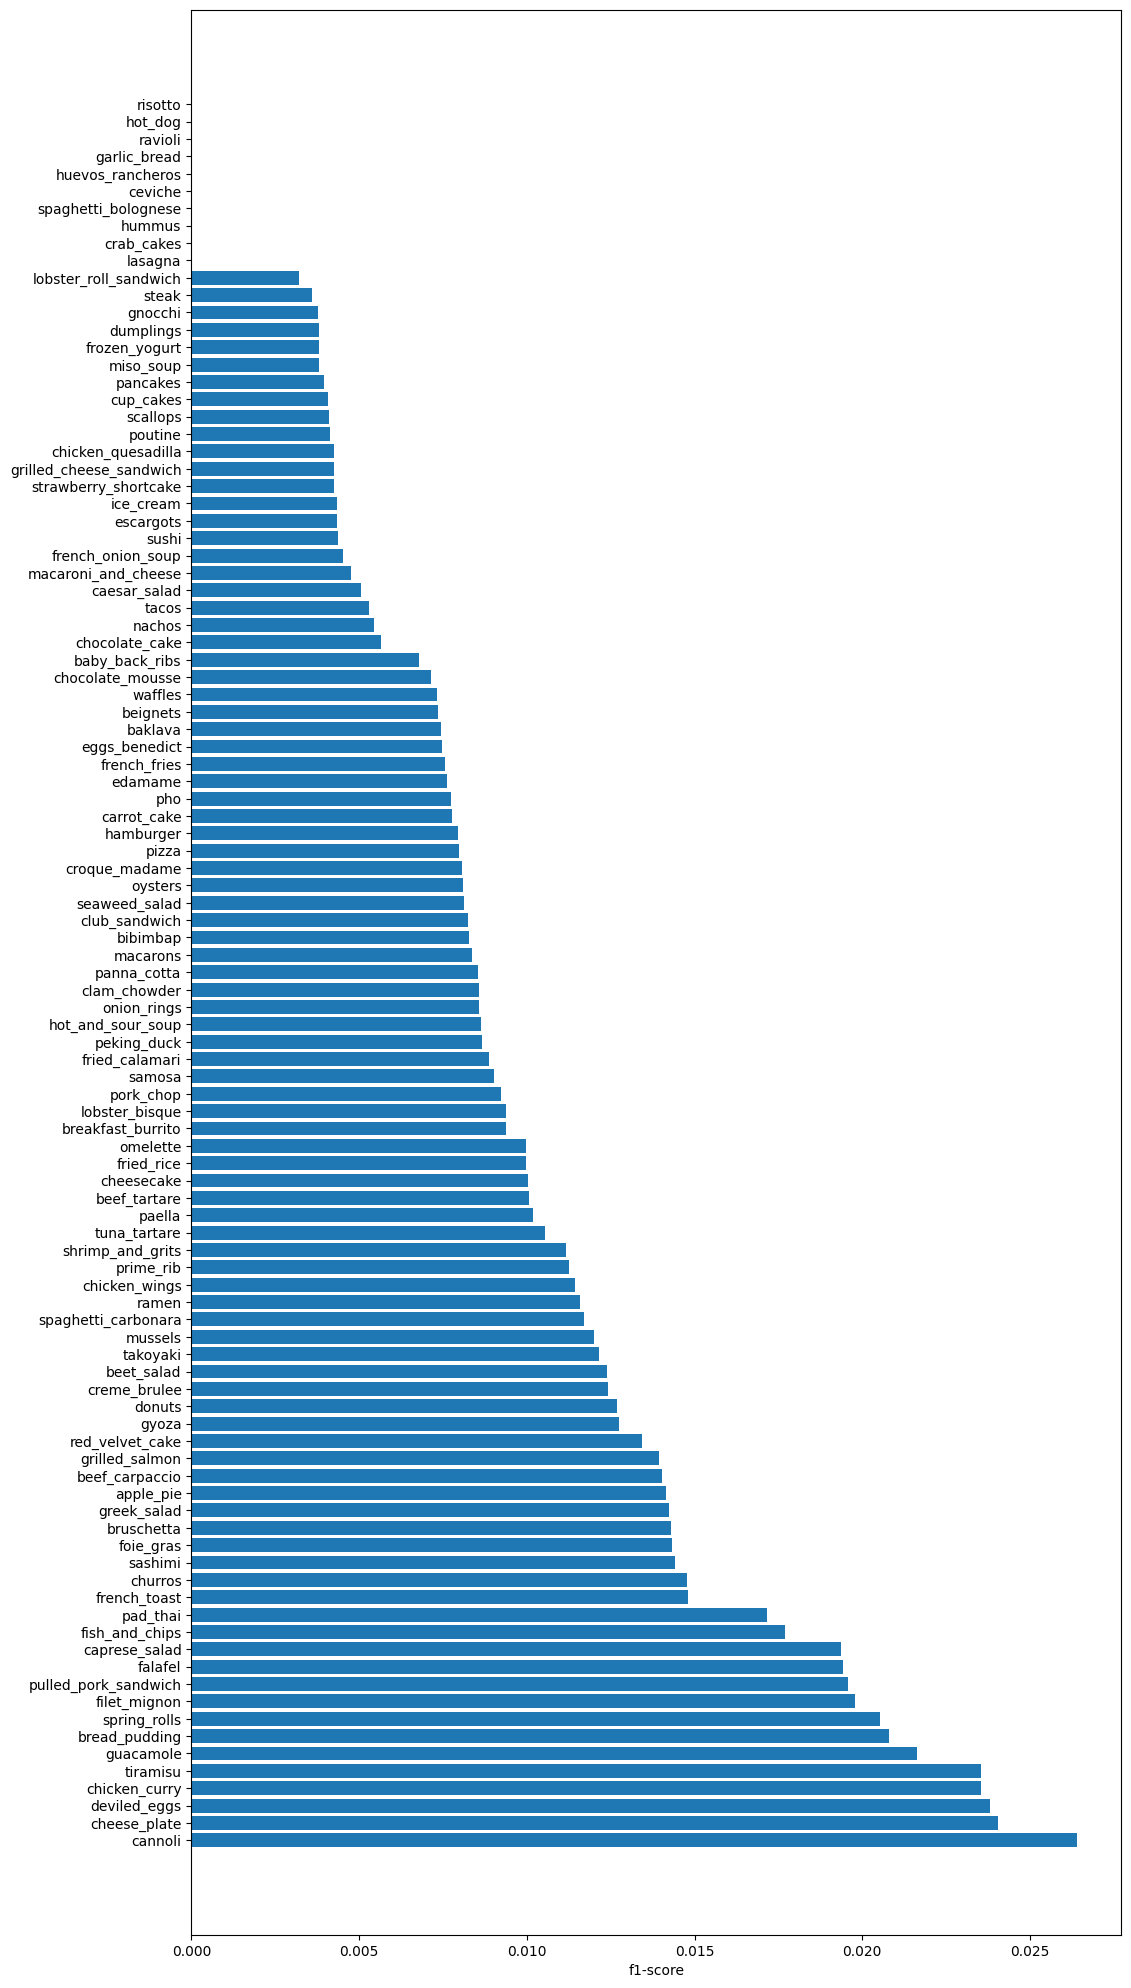

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,25))

scores = ax.barh(range(len(f1_score)), f1_score["f1_score"].values)
ax.set_yticks(range(len(f1_score)))
ax.set_yticklabels(f1_score["class_name"])
ax.set_xlabel("f1-score")

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(test_data.class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = test_data.calss_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

NotFoundError: ignored

<Figure size 1700x1000 with 0 Axes>

In [ ]:
import random
random.choices(test_data.class_names)